<a href="https://colab.research.google.com/github/SuryaAbyss/Web_Dev/blob/main/JsonDatasetWebScrap_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re



In [ ]:
df= pd.read_json('https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json',lines = True)


In [ ]:
df

,_id,student_id,class_id,scores
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,{'$oid': '50b59cd75bed76f46522c461'},48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,{'$oid': '50b59cd75bed76f46522c462'},48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,{'$oid': '50b59cd75bed76f46522c463'},48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,{'$oid': '50b59cd75bed76f46522c464'},48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         280 non-null    object
 1   student_id  280 non-null    int64 
 2   class_id    280 non-null    int64 
 3   scores      280 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.9+ KB


In [ ]:
#re.sub('^<td>.*">|<.*>','',arr[0])
#re.sub(r'<.*?">|</.*</td>','',arr[45])

In [ ]:
def new_id(arr):
    return re.sub(r'$oid:',arr[0],'')

df['_id'] = df.apply(new_id, axis=1)

TypeError: unhashable type: 'dict'

In [ ]:
df['scores'][:]

0      [{'type': 'exam', 'score': 57.92947112575566},...
1      [{'type': 'exam', 'score': 39.17749400402234},...
2      [{'type': 'exam', 'score': 88.22950674232497},...
3      [{'type': 'exam', 'score': 59.1805667559299}, ...
4      [{'type': 'exam', 'score': 4.444435759027499},...
                             ...                        
275    [{'type': 'exam', 'score': 19.75901367795435},...
276    [{'type': 'exam', 'score': 66.79008851052096},...
277    [{'type': 'exam', 'score': 87.50309579619501},...
278    [{'type': 'exam', 'score': 17.49112864462374},...
279    [{'type': 'exam', 'score': 26.67878234847454},...
Name: scores, Length: 280, dtype: object

In [ ]:
df['scores'][:][:]

0      [{'type': 'exam', 'score': 57.92947112575566},...
1      [{'type': 'exam', 'score': 39.17749400402234},...
2      [{'type': 'exam', 'score': 88.22950674232497},...
3      [{'type': 'exam', 'score': 59.1805667559299}, ...
4      [{'type': 'exam', 'score': 4.444435759027499},...
                             ...                        
275    [{'type': 'exam', 'score': 19.75901367795435},...
276    [{'type': 'exam', 'score': 66.79008851052096},...
277    [{'type': 'exam', 'score': 87.50309579619501},...
278    [{'type': 'exam', 'score': 17.49112864462374},...
279    [{'type': 'exam', 'score': 26.67878234847454},...
Name: scores, Length: 280, dtype: object

In [ ]:
exam_scores = []
for i in range(len(df['scores'])):
    exam_scores.append(df['scores'][i][0])


In [ ]:
exam_scores[0]

{'type': 'exam', 'score': 57.92947112575566}

In [ ]:
re.sub('^{.*:|}','',str(exam_scores[0]))

' 57.92947112575566'

In [ ]:
re.sub('^{.*:|}','',str(df('scores')[i][0]))

TypeError: 'DataFrame' object is not callable

In [ ]:
exam_scores = []
for i in range(len(df['scores'])):
    exam_scores.append(re.sub('^{.*:|}','',str(df['scores'][i][0])))

In [ ]:
exam_scores[:]

[' 57.92947112575566',
 ' 39.17749400402234',
 ' 88.22950674232497',
 ' 59.1805667559299',
 ' 4.444435759027499',
 ' 14.34345947841966',
 ' 18.20492211025179',
 ' 56.81981513867912',
 ' 60.19473636151568',
 ' 58.83297411100884',
 ' 30.93065784731665',
 ' 63.09737877102438',
 ' 47.38775906993299',
 ' 24.05118737353409',
 ' 80.6212442791788',
 ' 68.93370297588363',
 ' 5.231166018738698',
 ' 70.32953992025745',
 ' 76.01876674517686',
 ' 35.47946463550763',
 ' 47.71786215806567',
 ' 88.80822542748272',
 ' 95.99100704101919',
 ' 95.7950561891157',
 ' 86.2587791014086',
 ' 8.942018968262111',
 ' 31.08963442339938',
 ' 0.599873518920623',
 ' 5.466727688497352',
 ' 44.49334356888737',
 ' 46.17925407652636',
 ' 60.13912489935064',
 ' 91.60286135110157',
 ' 0.654309678602604',
 ' 67.50593066420024',
 ' 15.36563152024366',
 ' 73.48459944869943',
 ' 73.04238861317688',
 ' 21.58296008740177',
 ' 43.64758440439862',
 ' 22.38732080941065',
 ' 33.39752665396672',
 ' 46.17900883744647',
 ' 98.349293091

In [ ]:
exam_scores = []
for i in range(len(df['scores'])):
    exam_scores.append(round(float(re.sub('^{.*:|}','',str(df['scores'][i][0])))))

In [52]:
quiz_Score = []
for i in range(len(df['scores'])):
    quiz_Score.append(round(float(re.sub('^{.*:|}','',str(df['scores'][i][1])))))

In [ ]:
exam_scores[:]

[58,
 39,
 88,
 59,
 4,
 14,
 18,
 57,
 60,
 59,
 31,
 63,
 47,
 24,
 81,
 69,
 5,
 70,
 76,
 35,
 48,
 89,
 96,
 96,
 86,
 9,
 31,
 1,
 5,
 44,
 46,
 60,
 92,
 1,
 68,
 15,
 73,
 73,
 22,
 44,
 22,
 33,
 46,
 98,
 55,
 7,
 63,
 55,
 25,
 28,
 63,
 7,
 43,
 89,
 40,
 11,
 85,
 85,
 58,
 32,
 68,
 65,
 74,
 57,
 85,
 24,
 76,
 85,
 69,
 46,
 9,
 13,
 10,
 50,
 44,
 31,
 78,
 27,
 75,
 94,
 83,
 100,
 80,
 99,
 37,
 22,
 94,
 4,
 84,
 26,
 77,
 53,
 26,
 70,
 26,
 97,
 76,
 65,
 44,
 50,
 28,
 48,
 19,
 49,
 24,
 17,
 46,
 34,
 18,
 93,
 86,
 12,
 7,
 61,
 46,
 64,
 56,
 28,
 83,
 33,
 90,
 90,
 47,
 21,
 31,
 55,
 84,
 50,
 89,
 40,
 50,
 22,
 93,
 6,
 19,
 68,
 3,
 72,
 18,
 80,
 19,
 17,
 55,
 40,
 45,
 62,
 23,
 60,
 14,
 44,
 4,
 42,
 46,
 77,
 82,
 69,
 62,
 77,
 18,
 34,
 91,
 49,
 14,
 63,
 64,
 7,
 10,
 9,
 1,
 92,
 53,
 21,
 75,
 63,
 22,
 50,
 92,
 61,
 65,
 47,
 6,
 80,
 23,
 89,
 87,
 17,
 92,
 33,
 83,
 26,
 20,
 57,
 49,
 16,
 82,
 30,
 65,
 4,
 49,
 13,
 98,
 92,
 40,
 51

In [ ]:
str(df['scores'][4][3])

"{'type': 'homework', 'score': 83.9164548767836}"

In [ ]:
for i in range(len(df['scores'])):
   print(re.findall('\d+.\d+',str(df['scores'][i][2:])))

['68.1956781058743', '67.95019716560351', '18.81037253352722']
['20.81782269075502', '70.44520452408949', '50.66616327819226', '53.84983118363991']
['18.66254946562674', '40.28154176513361', '1.23735944117882', '88.96101200683958']
['6.48470951607214', '68.33519637418685', '78.53068038180965']
['86.79352850434199', '83.9164548767836']
['83.42772189120254', '49.86812935368258', '39.85525554437086']
['75.62999921143397', '72.41228797373115', '74.06744381708968']
['59.58797547174019', '67.42173915928456', '71.25502554312342', '94.46662737566072']
['82.80835343023551']
['18.05861540807023', '80.04086698967356']
['55.6752702814148', '63.15391302252755']
['34.6879008789745']
['22.17993073237026', '33.7647119689925', '18.29543263797219']
['68.81640554493546', '87.88279757549473', '83.36858109902629']
['91.50521146788955', '82.1425639828968', '16.64633943981927']
['43.10650652263911', '56.89478543605922']
['76.7208591903267', '41.14461420390943', '30.18199391733215']
['79.21965885764142', '78.

In [ ]:
val_1 = []
for i in range(len(df['scores'])):
   val_1.append(re.findall('\d+.\d+',str(df['scores'][i][2:])))

In [ ]:
val_1

[['68.1956781058743', '67.95019716560351', '18.81037253352722'],
 ['20.81782269075502',
  '70.44520452408949',
  '50.66616327819226',
  '53.84983118363991'],
 ['18.66254946562674',
  '40.28154176513361',
  '1.23735944117882',
  '88.96101200683958'],
 ['6.48470951607214', '68.33519637418685', '78.53068038180965'],
 ['86.79352850434199', '83.9164548767836'],
 ['83.42772189120254', '49.86812935368258', '39.85525554437086'],
 ['75.62999921143397', '72.41228797373115', '74.06744381708968'],
 ['59.58797547174019',
  '67.42173915928456',
  '71.25502554312342',
  '94.46662737566072'],
 ['82.80835343023551'],
 ['18.05861540807023', '80.04086698967356'],
 ['55.6752702814148', '63.15391302252755'],
 ['34.6879008789745'],
 ['22.17993073237026', '33.7647119689925', '18.29543263797219'],
 ['68.81640554493546', '87.88279757549473', '83.36858109902629'],
 ['91.50521146788955', '82.1425639828968', '16.64633943981927'],
 ['43.10650652263911', '56.89478543605922'],
 ['76.7208591903267', '41.1446142039094

In [48]:
l = []
for i in df['scores']:
    k = []
    for j in i:
      if(j['type'] == 'homework'):
        k.append(j['score'])
    x = sum(k)/len(k)
    l.append(round(x,2))

In [49]:
l

[51.65,
 48.94,
 37.29,
 51.12,
 85.35,
 57.72,
 74.04,
 73.18,
 82.81,
 49.05,
 59.41,
 34.69,
 24.75,
 80.02,
 63.43,
 50.0,
 49.35,
 78.95,
 48.69,
 62.63,
 77.05,
 27.45,
 28.3,
 79.61,
 65.54,
 56.07,
 38.85,
 64.12,
 72.57,
 63.64,
 66.8,
 38.88,
 67.87,
 49.42,
 60.25,
 62.13,
 63.73,
 35.59,
 46.35,
 71.01,
 49.96,
 65.41,
 38.58,
 47.36,
 5.33,
 41.97,
 32.34,
 26.46,
 34.32,
 42.41,
 59.89,
 84.12,
 69.13,
 36.18,
 47.14,
 61.65,
 88.8,
 33.42,
 98.92,
 7.11,
 48.58,
 59.41,
 85.84,
 45.72,
 50.51,
 34.56,
 47.23,
 52.77,
 47.43,
 46.31,
 51.99,
 13.59,
 68.15,
 51.82,
 35.32,
 92.25,
 41.99,
 70.65,
 44.89,
 31.46,
 43.27,
 93.56,
 53.63,
 13.96,
 46.2,
 19.4,
 26.19,
 40.47,
 48.14,
 42.46,
 45.85,
 22.42,
 58.38,
 87.0,
 26.28,
 33.16,
 64.7,
 33.41,
 39.08,
 63.59,
 66.01,
 72.53,
 23.57,
 43.92,
 52.52,
 10.42,
 57.29,
 73.13,
 37.03,
 53.06,
 56.44,
 28.85,
 52.69,
 49.99,
 53.76,
 42.92,
 44.52,
 49.03,
 91.91,
 11.5,
 43.28,
 63.82,
 49.66,
 78.34,
 45.13,
 79.95,
 36

In [51]:
for i in range(len(df['scores'])):
  li = re.findall('\d+.\d+',str(df['scores'][i][2:]))
  homework_score = round(sum(list(map(float,li)))/len(list(map(float,li))))

In [54]:
new_df = pd.DataFrame({'_id':df['_id'],'student_id':df['student_id'],
                       'class_id':df['class_id'],'exam_score':exam_scores,
                       'quiz_score':quiz_Score,'homework_score':l})

In [55]:
new_df

,_id,student_id,class_id,exam_score,quiz_score,homework_score
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,58,21,51.65
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,39,78,48.94
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,88,79,37.29
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,59,48,51.12
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,4,29,85.35
...,...,...,...,...,...,...
275,{'$oid': '50b59cd75bed76f46522c461'},48,10,20,88,30.80
276,{'$oid': '50b59cd75bed76f46522c462'},48,14,67,7,84.03
277,{'$oid': '50b59cd75bed76f46522c463'},48,8,88,78,60.19
278,{'$oid': '50b59cd75bed76f46522c464'},48,15,17,27,52.28


In [57]:
new_df.drop("class_id",inplace = True,axis = 1)

In [ ]:
# 1st plot
x=[1,2,3,4,5]
y=[10,20,30,40,50]

plt.plot(x,y)
plt.show()

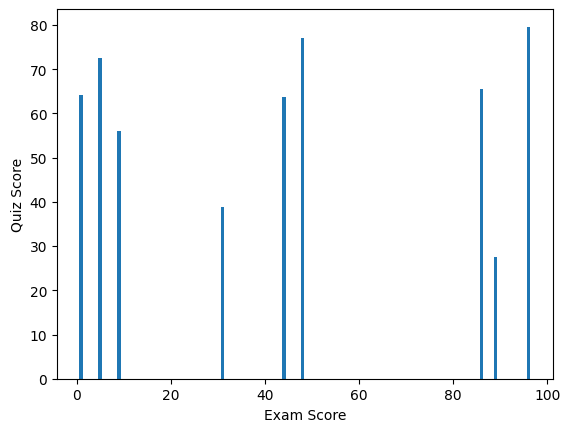

In [61]:
x= new_df.exam_score[20:30]
y= new_df.homework_score[20:30]
plt.xlabel("Exam Score")
plt.ylabel("Quiz Score")
plt.bar(x,y)
plt.show()
#makes no sense

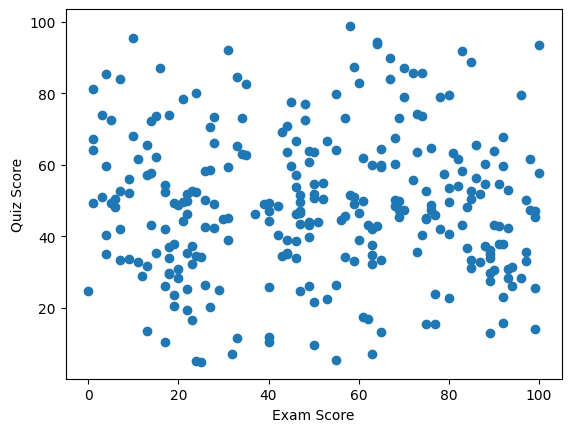

In [63]:
x= new_df.exam_score
y= new_df.homework_score
plt.xlabel("Exam Score")
plt.ylabel("Quiz Score")
plt.scatter(x,y)
plt.show()